In [1]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np

In [2]:
df=pd.read_csv('./data/Raw_baseball.csv')

In [3]:
df.tail()

,team,year,month,pov,obp,slg,ba,era,whip
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40
533,10,2022,5,0.385,0.318,0.387,0.251,6.51,1.67


In [4]:
df.columns

Index(['team', 'year', 'month', 'pov', 'obp', 'slg', 'ba', 'era', 'whip'], dtype='object')

In [53]:
#피쳐 변수 설정
feature_names= ['obp', 'slg', 'ba', 'era','whip']

#X변수 설정
dfX0 = pd.DataFrame(df, columns=feature_names)
#y변수 설정
dfy = pd.DataFrame(df, columns=["pov"] )
#상수항 설정
dfX = sm.add_constant(dfX0)


In [54]:
#회귀분석
model_baseball = sm.OLS(dfy, dfX)
result_baseball_ols = model_baseball.fit()
print(result_baseball_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    pov   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.05e-78
Time:                        20:02:25   Log-Likelihood:                 370.04
No. Observations:                 534   AIC:                            -728.1
Df Residuals:                     528   BIC:                            -702.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1741      0.080      2.187      0.0

In [9]:
df

,team,year,month,pov,obp,slg,ba,era,whip
0,1,2015,3,0.000,0.403,0.412,0.284,8.28,1.92
1,1,2015,4,0.136,0.290,0.295,0.208,5.52,1.79
2,1,2015,5,0.259,0.342,0.356,0.263,5.72,1.58
3,1,2015,6,0.478,0.353,0.456,0.290,5.93,1.68
4,1,2015,7,0.444,0.339,0.431,0.274,5.73,1.60
...,...,...,...,...,...,...,...,...,...
529,10,2021,8,0.500,0.331,0.331,0.231,4.33,1.46
530,10,2021,9,0.381,0.361,0.373,0.263,4.92,1.38
531,10,2021,10,0.278,0.318,0.310,0.219,4.18,1.47
532,10,2022,4,0.360,0.309,0.309,0.225,4.00,1.40


In [26]:
this_year_score=pd.DataFrame( pd.read_csv('./data/2022yearcumul01.csv') )

In [27]:
this_year_score

,team,OBP,SLG,BA,ERA,WHIP,POV,이름
0,9,0.350,0.409,0.269,4.03,1.34,0.542,기아
1,4,0.340,0.392,0.264,3.78,1.36,0.567,lg
2,5,0.326,0.365,0.246,3.49,1.26,0.600,키움
3,6,0.330,0.370,0.249,3.56,1.21,0.661,ssg
4,2,0.331,0.357,0.256,4.12,1.42,0.483,두산
5,1,0.326,0.352,0.247,3.58,1.24,0.475,kt
6,7,0.320,0.363,0.248,3.85,1.36,0.383,nc
7,3,0.321,0.365,0.260,3.86,1.39,0.483,삼성
8,10,0.317,0.355,0.242,5.30,1.53,0.361,한화
9,8,0.313,0.366,0.254,4.03,1.36,0.448,롯데


In [33]:
this_year_score = this_year_score.drop(['team', '이름'], axis=1)

In [34]:
this_year_score

,OBP,SLG,BA,ERA,WHIP,POV
0,0.350,0.409,0.269,4.03,1.34,0.542
1,0.340,0.392,0.264,3.78,1.36,0.567
2,0.326,0.365,0.246,3.49,1.26,0.600
3,0.330,0.370,0.249,3.56,1.21,0.661
4,0.331,0.357,0.256,4.12,1.42,0.483
5,0.326,0.352,0.247,3.58,1.24,0.475
6,0.320,0.363,0.248,3.85,1.36,0.383
7,0.321,0.365,0.260,3.86,1.39,0.483
8,0.317,0.355,0.242,5.30,1.53,0.361
9,0.313,0.366,0.254,4.03,1.36,0.448


In [36]:
row

team        9
OBP      0.35
SLG     0.409
BA      0.269
ERA      4.03
WHIP     1.34
POV     0.542
이름         기아
Name: 0, dtype: object

In [45]:
sm.add_constant(row)
row['const']=1

In [46]:
row

OBP      0.350
SLG      0.409
BA       0.269
ERA      4.030
WHIP     1.340
POV      0.542
const    1.000
Name: 0, dtype: float64

In [50]:
row[['OBP','SLG']]

OBP    0.350
SLG    0.409
Name: 0, dtype: float64

In [51]:
row

OBP     0.350
SLG     0.409
BA      0.269
ERA     4.030
WHIP    1.340
POV     0.542
Name: 0, dtype: float64

In [56]:
pov22=[]
pov22_pred=[]
pov22_team=[]
for idx, row in this_year_score.iterrows():
    row['const'] =1
    
    a= result_baseball_ols.predict(     row[ ['const', 'OBP','SLG','BA','ERA','WHIP' ]]    )
    print('예측값: ', round( a[0],3), end='    ')
    pov22_pred.append(round( a[0],3))
    b= this_year_score['POV'][idx]
    print('실제값: ',b)
    pov22.append(b)
    c=idx
    pov22_team.append(c)

예측값:  0.57    실제값:  0.542
예측값:  0.556    실제값:  0.567
예측값:  0.55    실제값:  0.6
예측값:  0.557    실제값:  0.661
예측값:  0.472    실제값:  0.483
예측값:  0.526    실제값:  0.475
예측값:  0.497    실제값:  0.383
예측값:  0.481    실제값:  0.483
예측값:  0.356    실제값:  0.361
예측값:  0.463    실제값:  0.448


In [57]:
pov22,pov22_pred

([0.542, 0.567, 0.6, 0.661, 0.483, 0.475, 0.383, 0.483, 0.361, 0.448],
 [0.57, 0.556, 0.55, 0.557, 0.472, 0.526, 0.497, 0.481, 0.356, 0.463])

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

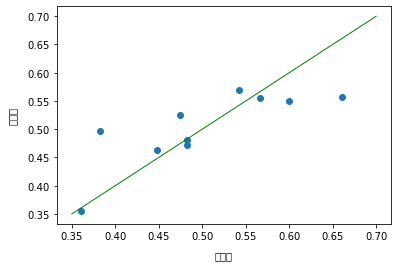

In [62]:
scatter =plt.scatter(pov22, pov22_pred) 
plt.xlabel('실제값',labelpad=10)
plt.ylabel('예측값', labelpad=10)
plt.plot([0.35, 0.7], [0.35, 0.7],color="green", lw='1',  )
plt.figure;